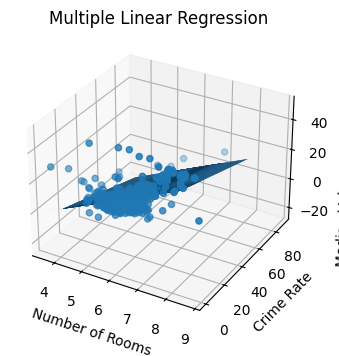

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_csv('BostonHousing.csv')

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the independent variables
x = data['rm']
y = data['crim']
z = data['medv']

# Add the data points
ax.scatter(x, y, z)

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Crime Rate')
ax.set_zlabel('Median Value of Homes ($1000s)')
plt.title('Multiple Linear Regression')

# Show the plot
plt.show()